open with google colab :
https://colab.research.google.com/github/rajatvegan/Notebooks/blob/main/1_project-NYC-taxi.ipynb

 # Maximizing Revenue tor laxi Cab Drivers through Payment type analysis

 dataset link : https://catalog.data.gov/dataset/2020-yellow-taxi-trip-data-january-june

- Problem Statement

In the fast-paced taxi booking sector, making the most of revenue is essential for long-term success and driver happiness
our goal is to use data driven insights to maximise revenue streams for taxi drivers in order to meet this need. Our research aims to determine whether payment methods have an impact on fare pricing by focusing on the relationship between payment type and fare amount.

- Objective

This project's main goal is to run an A/B test to examine the relationship between the total fare and the method of payment, we use pyhton hypothesis testing and descriptive statistics to extract useful information that can help taxi drivers generate more cash. In particular, we want to find out if there is a big diffrence in fares for those who pay with credit cards versus those who pay with cash.

- Research Question 

Is there a relationship between total fare amount and payment type and can we nudge customers towards payment methods that generate higher revenue for drivers, without negatively impacting customer experience?

In [203]:
# importing nessesary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")

In [80]:
# loading dataset (or load directly from database server or from api server)
df = pd.read_csv("C:/Users/Rajat/OneDrive/Desktop/STUDY/Database/2020_Yellow_Taxi_Trip_Data.csv",nrows=1000000)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [81]:
# exploratery data analysis
df.shape

(1000000, 18)

In [82]:
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [83]:
# change dtype object to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [84]:
df.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

In [85]:
# calculate duration and add new column for duration
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df.head(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,0 days 00:04:48
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,0 days 00:07:25


In [86]:
# convert duration to minutes
df['duration'] = df['duration'].dt.total_seconds() / 60
df.head(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,7.416667


In [87]:
# filtering required columns
df = df[['passenger_count', 'payment_type', 'fare_amount', 'trip_distance', 'duration']]
df.tail(3)

,passenger_count,payment_type,fare_amount,trip_distance,duration
999997,2.0,1.0,10.0,2.67,8.133333
999998,1.0,1.0,36.0,11.40,35.433333
999999,2.0,1.0,7.0,1.41,6.916667


In [88]:
# checking null values
df.isnull().sum()

passenger_count    1988
payment_type       1988
fare_amount           0
trip_distance         0
duration              0
dtype: int64

In [89]:
# count the rows of null values percentage, drop the rows with null values if the percentage is very low otherwise fill the null values
(df.isnull().sum()/len(df))*100

passenger_count    0.1988
payment_type       0.1988
fare_amount        0.0000
trip_distance      0.0000
duration           0.0000
dtype: float64

In [90]:
# null value data percentage is 0.1988 % so we can drop the rows 
df.dropna(inplace=True)
df.shape

(998012, 5)

In [91]:
df['passenger_count'] = df['passenger_count'].astype('int64')
df['payment_type'] = df['payment_type'].astype('int64')
df.dtypes

passenger_count      int64
payment_type         int64
fare_amount        float64
trip_distance      float64
duration           float64
dtype: object

In [92]:
# checking for dublicate values
df.duplicated().sum()

276658

In [93]:
# removing dublicate values
df.drop_duplicates(inplace=True)
df.shape

(721354, 5)

In [94]:
df['passenger_count'].unique(), df['payment_type'].unique()

(array([1, 4, 2, 3, 6, 5, 0, 8, 7, 9], dtype=int64),
 array([1, 2, 4, 3], dtype=int64))

In [95]:
# checking passenger count distribution in percentage
df['passenger_count'].value_counts(normalize=True)

passenger_count
1    0.606429
2    0.194519
3    0.062507
5    0.049637
4    0.036707
6    0.029640
0    0.020532
7    0.000015
8    0.000008
9    0.000004
Name: proportion, dtype: float64

In [96]:
# checking payment type distribution in percentage
df['payment_type'].value_counts(normalize=True)

payment_type
1    0.646626
2    0.341842
3    0.007306
4    0.004227
Name: proportion, dtype: float64

In [97]:
# filtering required data, ignoring the rows where these columns have very less percentage share 
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] <= 6)]    # passenger_count 0 means no passengers, we r doing analysis only how payment_type effect fare_amount 
df = df[(df.payment_type < 3)]
df.shape

(698613, 5)

In [98]:
# replacing 1 and 2 with card and cash in payment_type
df['payment_type'].replace([1,2],['card','cash'],inplace=True)
df.head(2)

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,card,6.0,1.2,4.800000
1,1,card,7.0,1.2,7.416667


In [99]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,698613.000000,698613.000000,698613.000000,698613.000000
mean,1.796355,15.229822,3.861488,19.349701
std,1.318576,14.143983,4.653438,82.159650
min,1.000000,-168.000000,-22.180000,-2770.366667
25%,1.000000,7.000000,1.210000,7.450000
50%,1.000000,10.500000,2.130000,12.150000
75%,2.000000,17.000000,4.200000,18.800000
max,6.000000,1238.000000,259.220000,4168.000000


In [100]:
# filtering data for negative values
df = df[df['trip_distance'] > 0]
df = df[df['duration'] > 0]
df = df[df['fare_amount'] > 0]
df.describe(),df.shape

(       passenger_count    fare_amount  trip_distance       duration
 count    692328.000000  692328.000000  692328.000000  692328.000000
 mean          1.798948      15.068167       3.893021      19.357082
 std           1.320772      13.586532       4.656509      81.874376
 min           1.000000       0.010000       0.010000       0.016667
 25%           1.000000       7.000000       1.230000       7.516667
 50%           1.000000      10.500000       2.160000      12.183333
 75%           2.000000      17.000000       4.230000      18.800000
 max           6.000000    1238.000000     259.220000    2458.400000,
 (692328, 5))

<Axes: ylabel='trip_distance'>

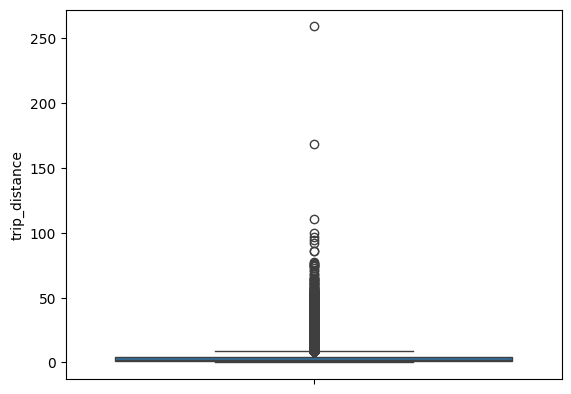

In [101]:
# checking outliers from visualization
sns.boxplot(df['trip_distance'])

((569665, 5), <Axes: ylabel='trip_distance'>)

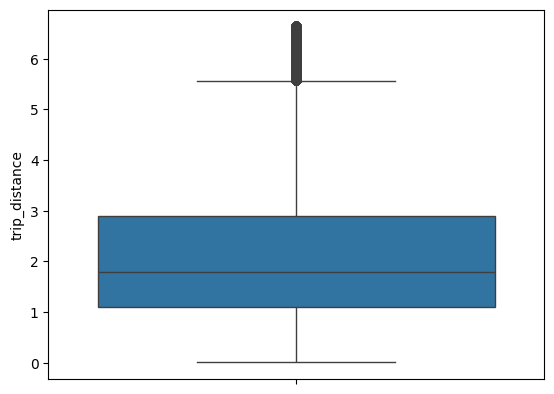

In [102]:
# removing outliers from IQR
for col in ['fare_amount', 'trip_distance', 'duration']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]

df.shape,sns.boxplot(df['trip_distance'])

DATA VISUALIZATION AND DRAW DATA-DRIVEN CONCLUSIONS

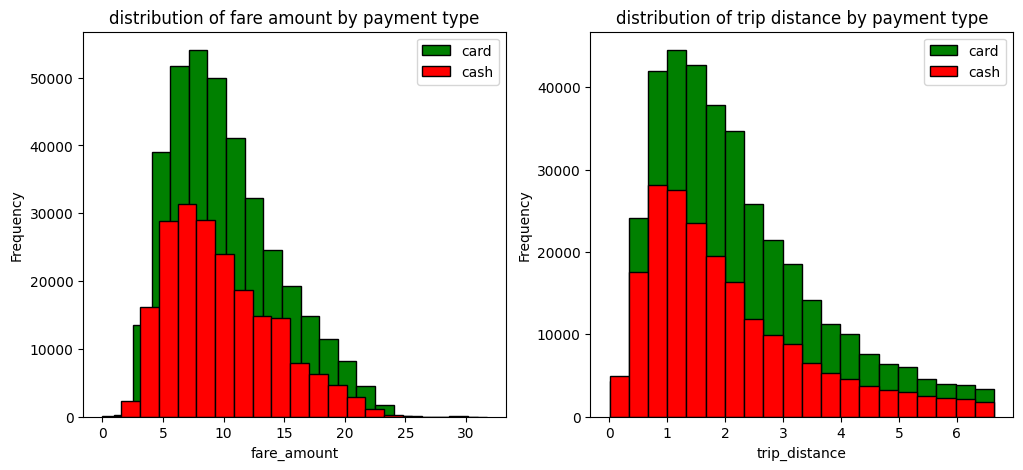

In [140]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)                   
plt.hist(df[df.payment_type == 'card']['fare_amount'],histtype='barstacked',bins=20,edgecolor='black',color='green',label='card')
plt.hist(df[df.payment_type == 'cash']['fare_amount'],histtype='barstacked',bins=20,edgecolor='black',color='red',label='cash')
plt.title('distribution of fare amount by payment type')
plt.xlabel('fare_amount')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1,2,2)
plt.hist(df[df.payment_type == 'card']['trip_distance'],histtype='barstacked',bins=20,edgecolor='black',color='green',label='card')
plt.hist(df[df.payment_type == 'cash']['trip_distance'],histtype='barstacked',bins=20,edgecolor='black',color='red',label='cash')
plt.title('distribution of trip distance by payment type')
plt.xlabel('trip_distance')
plt.ylabel('Frequency')
plt.legend()

plt.show()

In [141]:
# distribution of fare amount and trip distance by payment type
df.groupby('payment_type').agg({'fare_amount':['mean','std'],'trip_distance':['mean','std']})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
card           10.244109  4.334611      2.220104  1.390960
cash            9.788998  4.360597      2.060253  1.414933

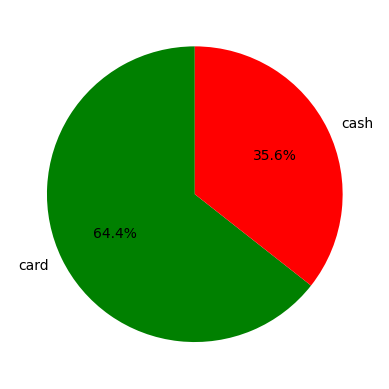

In [213]:
plt.pie(df['payment_type'].value_counts(),labels=df.payment_type.value_counts().index,autopct='%1.1f%%',startangle=90,colors=['green','red'])
plt.show()

In [162]:
p_count = df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
p_count.rename(columns={'passenger_count':'count'},inplace=True)

p_count['perc'] = (p_count['count']/p_count['count'].sum())*100

p_count

count       perc
payment_type passenger_count                   
card         1                221856  38.944994
             2                 75003  13.166159
             3                 24081   4.227221
             4                 12449   2.185319
             5                 20990   3.684622
             6                 12479   2.190586
cash         1                124103  21.785260
             2                 39733   6.974801
             3                 13650   2.396145
             4                  9430   1.655359
             5                  9902   1.738215
             6                  5989   1.051320

In [164]:
p_count.reset_index(inplace=True)
p_count

,index,payment_type,passenger_count,count,perc
0,0,card,1,221856,38.944994
1,1,card,2,75003,13.166159
2,2,card,3,24081,4.227221
3,3,card,4,12449,2.185319
4,4,card,5,20990,3.684622
5,5,card,6,12479,2.190586
6,6,cash,1,124103,21.785260
7,7,cash,2,39733,6.974801
8,8,cash,3,13650,2.396145
9,9,cash,4,9430,1.655359


In [175]:
df1 = pd.DataFrame(columns= ['payment_type',1,2,3,4,5,6])
df1['payment_type'] = ['card','cash']
df1.iloc[0,1:] = p_count.iloc[0:6,-1]                   
df1.iloc[1,1:] = p_count.iloc[6:,-1]        
df1

,payment_type,1,2,3,4,5,6
0,card,38.944994,13.166159,4.227221,2.185319,3.684622,2.190586
1,cash,21.78526,6.974801,2.396145,1.655359,1.738215,1.05132


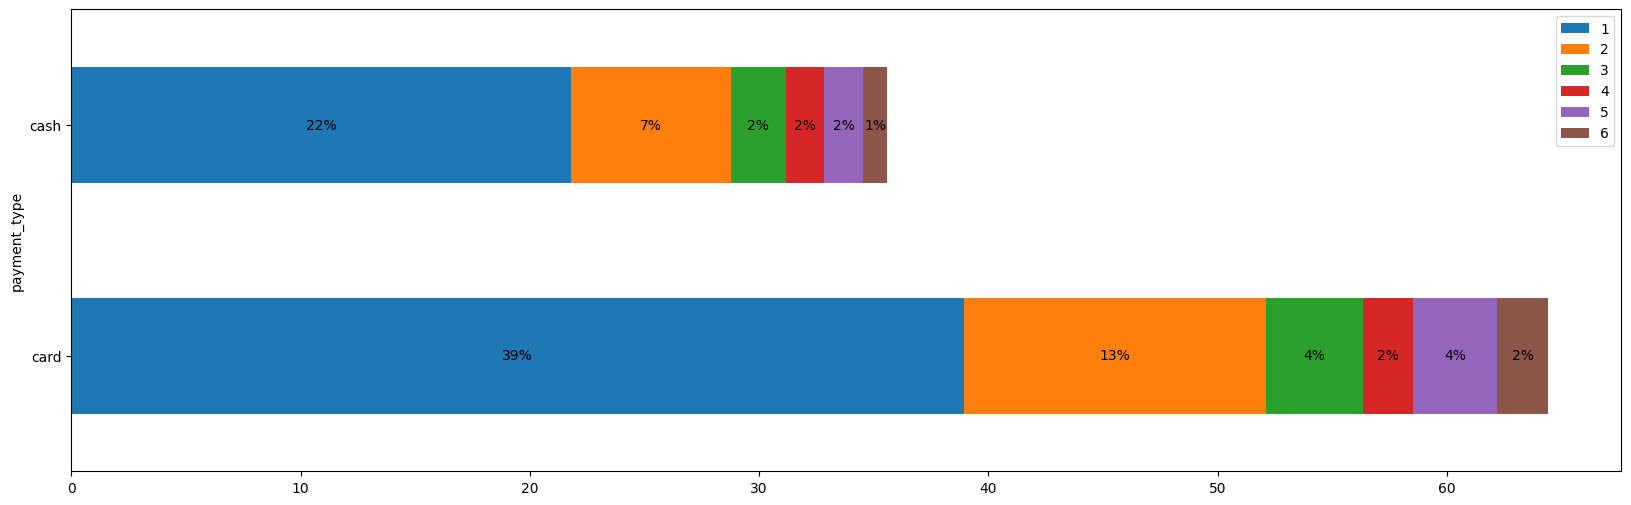

In [201]:
fig, ax = plt.subplots(figsize=(20, 6))
df1.plot(x='payment_type',kind='barh',stacked=True,ax=ax)  

# Annotate the values on each bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f}%'.format(width), 
            horizontalalignment='center', 
            verticalalignment='center')

HYPOTHESIS TESTING
- null hypothesis: there is no diffrence in average fare between cutomers who pay with credit card and those who pay with cash
- alternative hypothesis: there is a diffrence in average fare between cutomers who pay with credit card and those who pay with cash

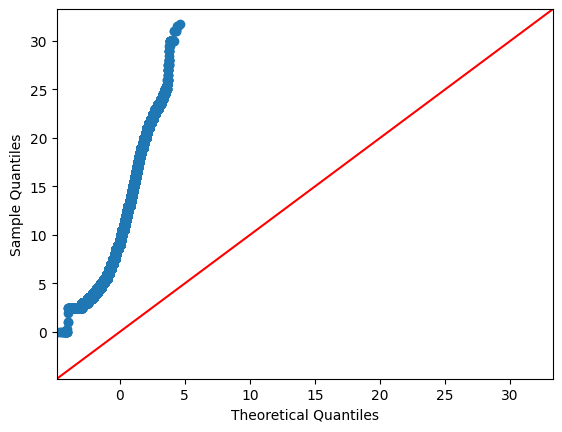

In [205]:
# checking distribution of fare amount using qqplot, if along with the line 45 they are normally distributed
sm.qqplot(df['fare_amount'], line='45')
plt.show()

<Axes: xlabel='fare_amount', ylabel='Count'>

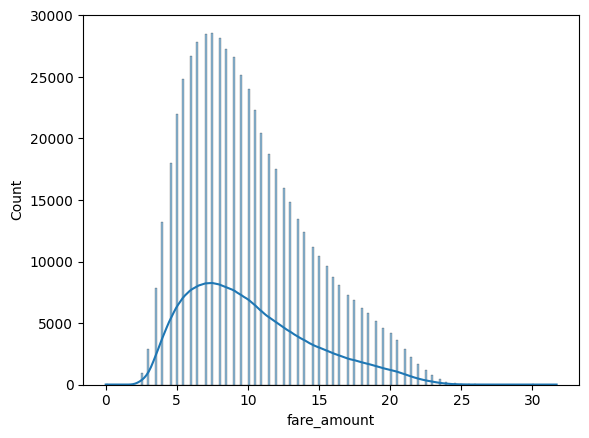

In [206]:
# checking distribution of fare amount using histogram if it is normally distributed then graph will be bell shaped curve
sns.histplot(df['fare_amount'],kde=True)

In [211]:
# sample of card and cash 
card_sample = df[df['payment_type'] == 'card']['fare_amount']
cash_sample = df[df['payment_type'] == 'cash']['fare_amount']
card_sample,cash_sample

(0          6.0
 1          7.0
 2          6.0
 3          5.5
 9          8.0
           ... 
 999987    11.5
 999990     4.5
 999994     7.5
 999996     8.5
 999997    10.0
 Name: fare_amount, Length: 366858, dtype: float64,
 5          2.5
 11         9.5
 15         9.0
 17        11.5
 26        21.0
           ... 
 999980    18.0
 999982    12.0
 999983    11.5
 999984     8.0
 999995     9.5
 Name: fare_amount, Length: 202807, dtype: float64)

In [212]:
t_stats,p_value = st.ttest_ind(card_sample,cash_sample,equal_var=False)
print(f't_stats = {t_stats}, p_value = {p_value}')

t_stats = 37.798347828692215, p_value = 0.0


-  With a T-statistic of 37.7983 and a P-value of less than 0.05, we reject the null hypothesis, suggesting 
 that there is indeed a significant difference in average fare between the two payment methods. 